In [1]:
import gc
import numpy as np
import pandas as pd
import back_testing as bt

gc.collect()

0

In [2]:
price_df = pd.read_csv('./data/sp500.csv')
price_df.set_index('datadate', inplace=True)
df_ = price_df[['AAPL', 'DIS', 'XOM', 'INTC', 'MSFT', 'AMZN', 'NVDA', 'CRM', 'GOOGL', 'TSLA']].dropna(axis=0)
df_.index = pd.to_datetime(df_.index, format='%Y-%m-%d')

idx_df = pd.read_csv('./data/GSPC.csv', index_col='Date')
idx_df = idx_df.pct_change().apply(lambda x: np.log1p(x)).dropna()
idx_df.index = pd.to_datetime(idx_df.index, format='%Y-%m-%d')

returns = bt.get_momentum(df_, 1)
momentum_12m = bt.get_momentum(df_, 12)

weight_dict = {}
str_name_lst = ['static', 'MR', 'TF', 'DM', 'GTAA', 'GTAA5', 'S&P 500']

weight_dict[str_name_lst[0]] = bt.buy_and_hold_strategy(df_)
weight_dict[str_name_lst[1]] = bt.mean_reversion_zscore_strategy(df_)
weight_dict[str_name_lst[2]] = bt.trend_following_zscore_strategy(df_)
weight_dict[str_name_lst[3]] = bt.dual_momentum_strategy(momentum_12m)
weight_dict[str_name_lst[4]] = bt.gtaa_aggressive3_strategy(momentum_12m, df_)
weight_dict[str_name_lst[5]] = bt.gtaa5_momentum_strategy(momentum_12m, df_)

In [3]:
result_df = pd.DataFrame()
for str_name in str_name_lst[:-1]:
    result_df = bt.return_Table(weight_dict[str_name], returns, result_df, True, 'Neutral', True, False)

result_df = pd.concat([result_df, idx_df], axis=1)
result_df.columns = str_name_lst
# result_df.to_csv('./general_results/result.csv')

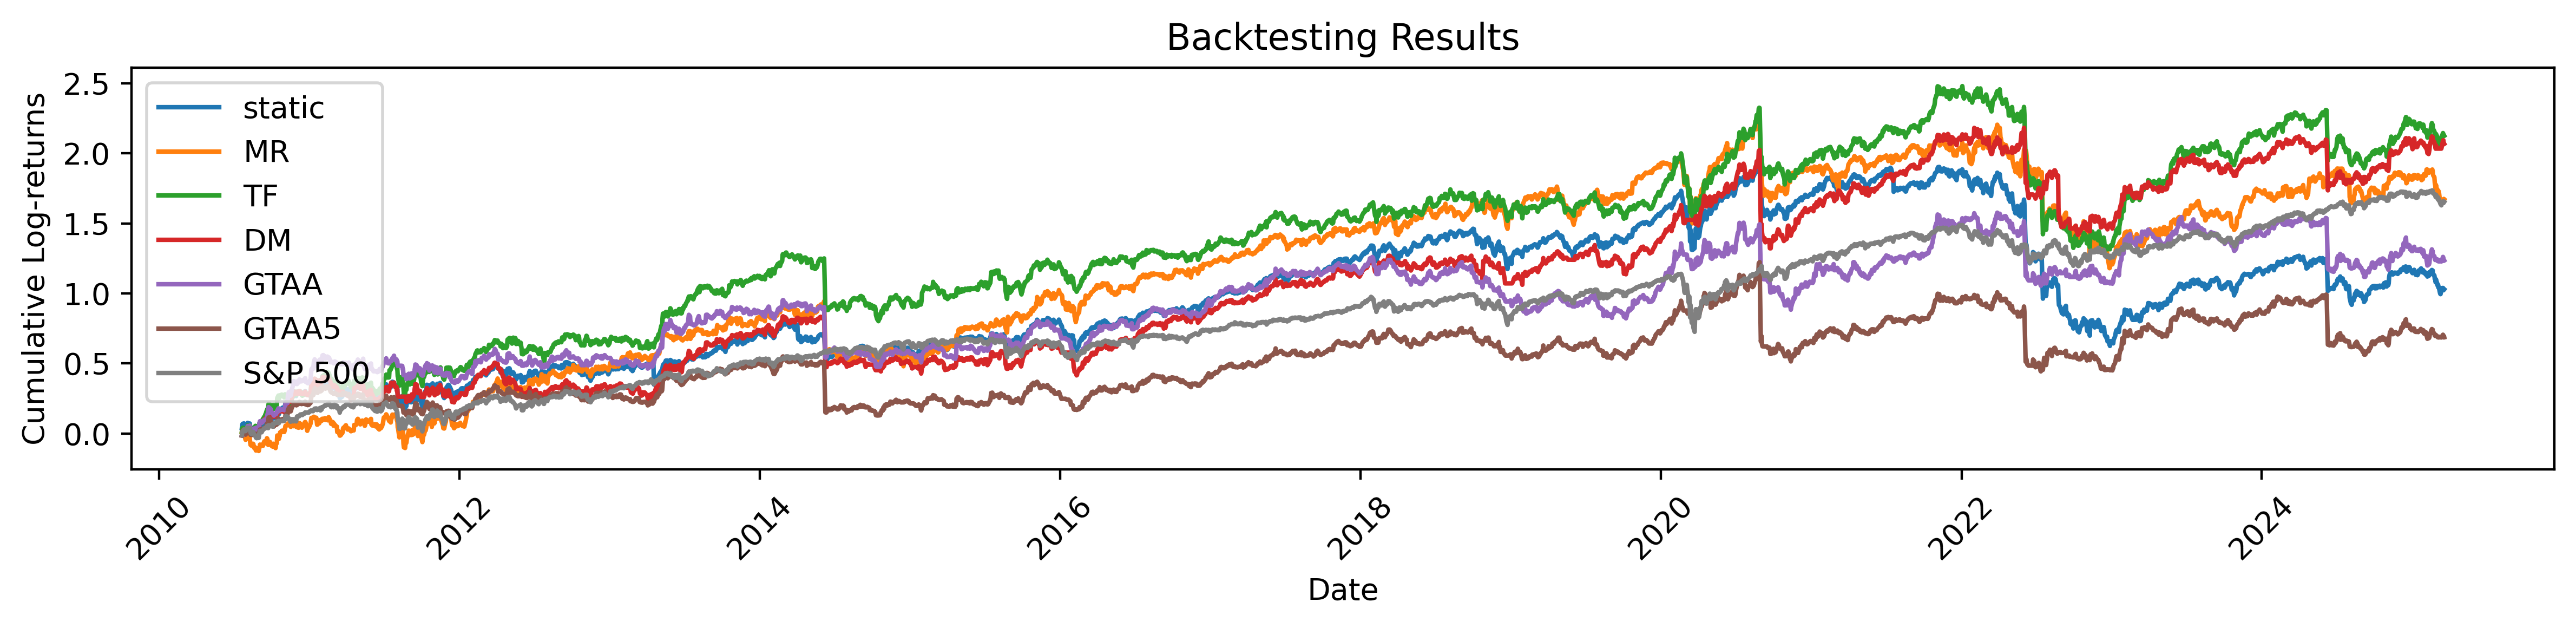

In [4]:
bt.plot_result(result_df, True)

In [5]:
for str_name in str_name_lst[:-1]:
    print(f"{str_name} : {bt.cal_turnover(weight_dict[str_name])}")

static : 0.00
MR : 1589.50
TF : 624.50
DM : 746.72
GTAA : 1002.17
GTAA5 : 834.50


In [6]:
metric = bt.METRICS(result_df, result_df.index)
metric.cal_describe()
metric.cal_monthly_statistics()

In [7]:
metric.annual_statistics

,static,MR,TF,DM,GTAA,GTAA5,S&P 500
count,3690.0,3690.0,3690.0,3690.0,3690.0,3690.0,3690.0
cumulative return,0.0032,0.0054,0.0069,0.0067,0.004,0.0022,0.0054
annualized return mean,0.0032,0.0054,0.0069,0.0067,0.004,0.0022,0.0054
annualized return std,0.0638,0.0723,0.0776,0.0732,0.0654,0.0632,0.0381
annualized return downside std,0.067,0.0697,0.0814,0.0868,0.0728,0.08,0.0315
sharpe ratio,0.0499,0.0742,0.0883,0.0922,0.0615,0.0353,0.1415
sortino ratio,0.0475,0.077,0.0843,0.0777,0.0553,0.0279,0.171
gross profit,20.3062,23.7497,24.5281,20.5749,19.162,15.156,14.0337
gross loss,-19.3287,-22.1051,-22.4274,-18.5079,-17.9275,-14.4699,-12.38
profit factor,1.0506,1.0744,1.0937,1.1117,1.0689,1.0474,1.1336


In [8]:
metric.monthly_statistics

,static,MR,TF,DM,GTAA,GTAA5,S&P 500
Mean,0.0003,0.0004,0.0006,0.0006,0.0003,0.0002,0.0004
Standard deviation,0.0179,0.0202,0.0216,0.0204,0.0183,0.0177,0.0108
Standard error,0.0003,0.0003,0.0004,0.0003,0.0003,0.0003,0.0002
t-statistic,0.9327,1.4026,1.6582,1.695,1.1217,0.6473,2.7476
Min,-0.2997,-0.3581,-0.363,-0.5672,-0.362,-0.5672,-0.1277
25%,-0.0061,-0.0076,-0.0074,-0.0059,-0.0056,-0.0043,-0.0038
50%,0.0013,0.001,0.0014,0.0003,0.0001,0.0001,0.0007
75%,0.0083,0.0093,0.0102,0.0086,0.0076,0.006,0.0056
Max,0.0979,0.0987,0.1055,0.0874,0.0769,0.0665,0.0897
Skew,-5.1426,-4.7019,-6.2056,-10.9192,-8.1644,-15.7314,-0.7467
